# SENTIMENT ANALYSIS CLASSIFIER

#### The goal of this notebook is to create a sentiment analysis for financial news

In [161]:
import re 
import string
import collections

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1400)
import matplotlib.pyplot as plt
import seaborn as sns

##
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords  

%matplotlib inline

## 1. Import Data

In [125]:
df = pd.read_csv('data/data/all-data.csv', names=['sentiment', 'article_text'])
df = df[['article_text', 'sentiment']]

In [126]:
df.shape
print(f"Number of articles: {df.shape[0]}")

Number of articles: 4846


In [127]:
df.head(10)

,article_text,sentiment
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",neutral
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",neutral
2,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",negative
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,positive
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",positive
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,positive
6,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
7,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .",positive
8,Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .,positive
9,"Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .",positive


In [128]:
df['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

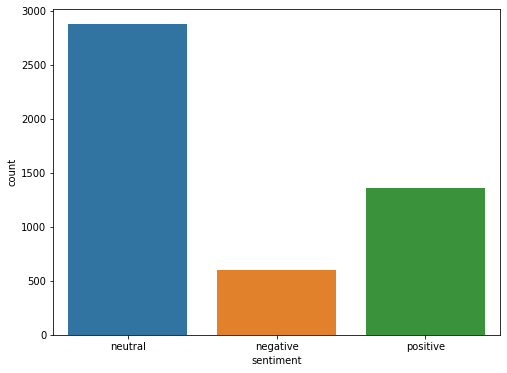

In [129]:
plt.figure(figsize=(8,6))
sns.countplot(x="sentiment", data=df)

## 2. Preprocess Text

- Remove digits
- Remove stopwords
- Remove special characters
- Lowercase strings

In [130]:
try:
    stop_words = set(stopwords.words('english')) 
    print(stop_words)
except: 
    nltk.download('stopwords')

{'weren', 'm', 'shouldn', 'his', 'theirs', 'between', 'so', 'where', 'its', 'don', 'ourselves', 'him', 'because', 'itself', 'once', 'he', 'and', 'until', 'such', 'own', 'wasn', 'her', 'from', 'my', 'being', 'over', 'himself', 'for', 'y', "you've", 'will', 'whom', "mightn't", 'below', 'did', 'herself', 'further', 'their', 'or', 'yourselves', 'll', 'are', "hadn't", 'off', 'when', 'your', "aren't", 'an', 'both', "she's", 'some', 'should', 's', 're', 'all', 'too', 'against', "couldn't", 'is', 'only', 'mightn', "you're", 'had', "didn't", 'other', 'does', "should've", 'do', 'with', 'yours', 'nor', 'hasn', 'hadn', 'out', 'same', 'having', 'how', 'd', 'it', 'yourself', 'in', 'have', 'any', 'if', 'haven', 'myself', 'doesn', 'couldn', 'down', 'themselves', 'o', 'was', 'up', 'be', "shouldn't", "it's", "doesn't", 'mustn', "mustn't", 'am', 'who', "you'd", 'while', 'they', 'those', 'than', "won't", 'she', 'into', 'no', 'needn', 'about', 'each', 'before', 'why', 'this', "needn't", 'them', 'through', 

In [134]:
def preprocess_text(text, stop_words):
    #remove digits
    text = re.sub(r'[0-9]+', '', text)
    #remove special characters
    special_character = string.punctuation
    for char in special_character:
        text = text.replace(char, '')
    text = text.strip()
    ##tokenize and remove stopwords
    word_tokens = word_tokenize(text)  
    text_tokens = [w for w in word_tokens if not w in stop_words]
    clean_text = ' '.join(text_tokens)
        
    return clean_text.lower()

In [135]:
df['article_text_clean'] = df['article_text'].apply(lambda x: preprocess_text(x, stop_words))

In [139]:
df.tail()

,article_text,sentiment,article_text_clean
4841,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,negative,london marketwatch share prices ended lower london monday rebound bank stocks failed offset broader weakness ftse
4842,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",neutral,rinkuskiai beer sales fell per cent million litres kauno alus beer sales jumped per cent million litres
4843,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",negative,operating profit fell eur mn eur mn including vessel sales gain eur mn
4844,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",negative,net sales paper segment decreased eur mn second quarter eur mn second quarter operating profit excluding nonrecurring items rose eur mn eur mn
4845,"Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .",negative,sales finland decreased january sales outside finland dropped


In [138]:
# Analyze the most frequent words of each category with the clean text

In [169]:
def plot_most_frequent_words_per_category(sentiment, plot=True):
    df_sentiment = df[df['sentiment'] == sentiment].reset_index(drop=True)
    sentiment_array = list(np.array(df_sentiment['article_text_clean']))
    #concatenate all the text
    sentiment_text = ' '.join(sentiment_array)
    sentiment_tokens = word_tokenize(sentiment_text)
    counter_sentiment = collections.Counter(sentiment_tokens)
    most_frequent = counter_sentiment.most_common(20)
    print(most_frequent)
    words = [word[0] for word in most_frequent]
    frequency = [word[1] for word in most_frequent]
    
    if plot:
        
    pass

In [172]:
plot_most_frequent_words_per_category('neutral')

[('the', 969), ('company', 508), ('eur', 315), ('said', 237), ('finland', 219), ('finnish', 215), ('million', 193), ('business', 190), ('group', 187), ('new', 179), ('sales', 163), ('shares', 163), ('services', 151), ('also', 145), ('share', 139), ('market', 131), ('in', 114), ('net', 112), ('total', 100), ('helsinki', 95)]


In [168]:
df_positive = df[df['sentiment'] == 'positive'].reset_index(drop=True)
positive_array = list(np.array(df_positive['article_text_clean']))
#concatenate all the text
positive_text = ' '.join(positive_array)
positive_tokens = word_tokenize(positive_text)
counter_positive = collections.Counter(positive_tokens)
most_frequent = counter_positive.most_common(20)
print(most_frequent)

[('eur', 595), ('the', 280), ('mn', 262), ('company', 240), ('said', 230), ('finnish', 198), ('net', 196), ('sales', 192), ('profit', 191), ('million', 170), ('year', 143), ('period', 139), ('mln', 128), ('operating', 122), ('quarter', 107), ('oyj', 97), ('group', 96), ('rose', 94), ('increased', 89), ('new', 82)]


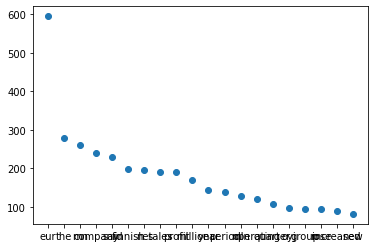

In [180]:
words = [word[0] for word in most_frequent]
frequency = [word[1] for word in most_frequent]

plt.scatter(x=words, y=frequency)